@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software}
        }

In [1]:
# General-level imports:
import os
import datetime

import numpy as np
import pandas as pd

# For data-reading capabilities:
from seppy.tools import Event

# Importing the Regression-Onset tool:
import regression_onset_tool as reg

## Selecting the data file; choose either SEPpy or Local

> SEPpy employs automatic data-loading capabilities online

> Local searches for the data file on your computer

In [10]:
display(reg.select_data.data_file)

ToggleButtons(description='Load data from: ', options=('SEPpy', 'Local'), tooltips=('Select SEPpy for data loa…

In [8]:
reg.select_data.data_file.value

'Local'

### Use either SEPpy to acquire the desired data, or directly choose your own file below:

In [3]:
if reg.select_data.data_file.value == "SEPpy":
import seppy.tools.widgets as w
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('PSP', 'SOHO', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', 'Wind'), …

Dropdown(description='Sensor:', options=('isois-epihi', 'isois-epilo'), value='isois-epihi')

Dropdown(description='Viewing:', options=('A', 'B'), value='A')

Dropdown(description='Species:', options=('protons', 'electrons'), value='protons')

In [6]:
# To download (or load if files are locally present) SEPpy data, one needs to provide a time span.
start_date = datetime.datetime(2022, 1, 20)
end_date =  datetime.datetime(2022, 1, 21)

# Initializes the SEPpy Event object
seppy_data = Event(spacecraft=w.spacecraft_drop.value, sensor=w.sensor_drop.value, species=w.species_drop.value,
                     start_date=start_date, end_date=end_date, data_level="l2",
                     data_path="data/", viewing=w.view_drop.value)

# Exports the data to a pandas dataframe
df = reg.externals.export_seppy_data(event=seppy_data)

## If you used SEPpy to acquire data, do not run the next cell

In [3]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv",
            "simulated_event_profiles.csv",
            "solo_ept_sun_e.csv"]

index_col_names = ["TimeUTC",
                  "datetime",
                  "datetime"]

index = 2

filename = f"{path}{filenames[index]}"

df = pd.read_csv(filename, parse_dates=True, index_col=index_col_names[index])

In [4]:
# Check the dataframe
display(df)

,E0,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,E24,E25,E26,E27,E28,E29,E30,E31,E32,E33
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-20 00:00:30.451561,NaN,610.8765,0.0000,2319.62160,831.95230,403.3569,0.00000,577.58466,457.06552,219.21864,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,37.866673,45.647266,50.158504,0.00000
2022-01-20 00:01:30.451561,NaN,1221.7530,0.0000,927.84863,415.97614,403.3569,299.53607,577.58466,0.00000,0.00000,...,51.61536,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2022-01-20 00:02:30.451561,NaN,1221.7530,491.7059,927.84863,0.00000,806.7138,0.00000,0.00000,228.53276,0.00000,...,0.00000,0.000000,43.441692,0.000000,0.000000,0.000000,0.000000,45.647266,0.000000,60.36797
2022-01-20 00:03:30.451561,NaN,0.0000,983.4118,463.92432,1663.90450,1210.0707,0.00000,577.58466,228.53276,0.00000,...,0.00000,46.115623,0.000000,38.311687,0.000000,35.854694,0.000000,45.647266,0.000000,0.00000
2022-01-20 00:04:30.451561,NaN,610.8765,983.4118,1391.77300,831.95230,1210.0707,599.07214,577.58466,228.53276,438.43730,...,0.00000,0.000000,0.000000,38.311687,0.000000,0.000000,0.000000,45.647266,50.158504,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-21 23:55:30.451561,NaN,2443.5060,983.4118,2319.62160,1247.92830,1210.0707,599.07214,1443.96150,0.00000,438.43730,...,51.61536,92.231250,86.883385,0.000000,79.480675,35.854694,37.866673,136.941800,100.317010,120.73594
2022-01-21 23:56:30.451561,NaN,1832.6294,1966.8236,1855.69730,415.97614,2016.7845,299.53607,1443.96150,457.06552,657.65594,...,51.61536,46.115623,0.000000,38.311687,79.480675,35.854694,75.733345,136.941800,50.158504,482.94376
2022-01-21 23:57:30.451561,NaN,1221.7530,2458.5295,927.84863,1247.92830,2823.4985,1497.68030,577.58466,1142.66380,438.43730,...,154.84608,46.115623,130.325070,38.311687,0.000000,71.709390,75.733345,45.647266,250.792510,0.00000


## Use the quicklook-plot in the cell below to apply a selection to the data:

1) Use the `selection` parameter to set the selection such that it encompasses at least the background and peak of the event.

2) `selection` can be either a timestamp or a pair of timestamps given as strings, e.g., ["2025-03-19 12:00", "2025-03-20 18:00"].

3) A pair of timestamps define a selection between the timestamps; a single timestamp defines selection up to that time from the start of the data file.

4) Not providing `selection` enables the user to apply the selection by clicking on the plot instead. A single click applies selection UP TO the chosen time. Clicking again overwrites the previous click.

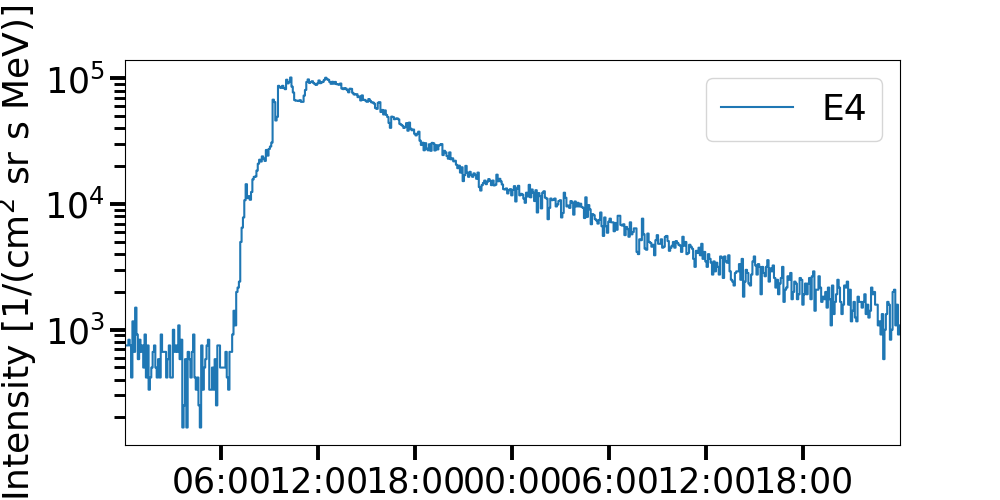

In [12]:
# Initializing the tool with input data
event = reg.Reg(data=df)

# Choose the channel(s) to examine in quicklook plot
channel = "E4" #"H_Flux_0"

# Leaving selection to None 
selection = None

# 
%matplotlib ipympl
event.quicklook(channel=channel, resample="5 min") # selection=["2022-01-20 02:00", "2022-01-20 12:00"]

## Use the find_breakpoints() -method to find a given number of breakpoints in the selected segment of data:

> fill_zeroes (bool) is a switch that applies filling out 0 count bins with a filler value f that satisfies the equation:
$$
\mu_{lg} = \frac{1}{N} \bigg( \sum_{i}^{N_{nz}} \lg(j_{i,nz}) + (N-N_{nz}) \lg(f) \bigg),
$$
> where $\mu_{lg}$ is the logarithm of the mean of the background, $N$ is the total number of data points in the background, $N_{nz}$ is the number of non-zero data in the background, $j_{i, nz}$ is a non-zero intensity measurement in the background and $\lg(\cdot)$ is the 10-base logarithm.

Data selection: 2022-01-20 00:01:00.451561, 2022-01-20 12:26:00.451561
Regression converged: True


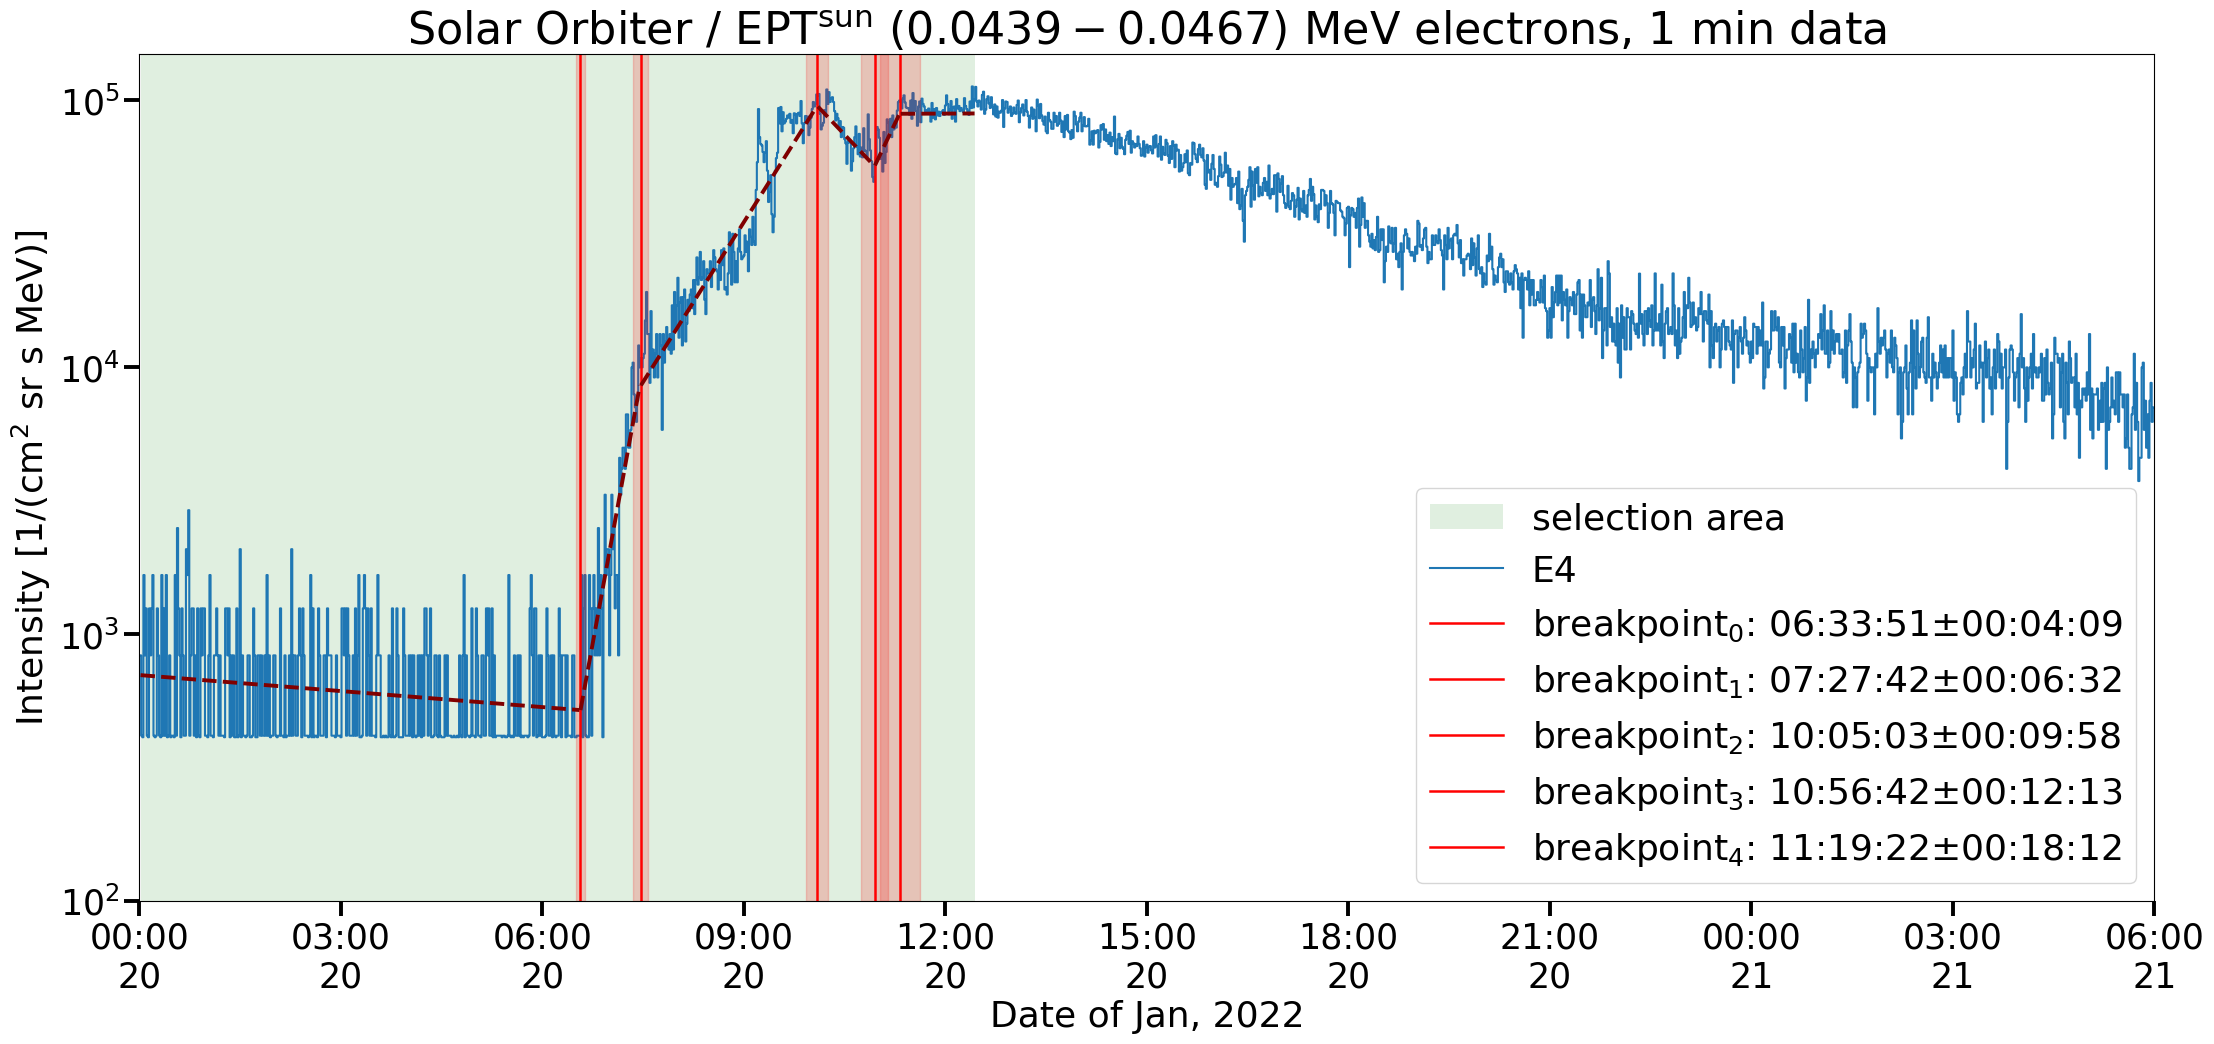

In [13]:
# Title for the figure (optional)
title = r"Solar Orbiter / EPT$^{\mathrm{sun}}$ ($0.0439 - 0.0467$) MeV electrons, 1 min data"

# The channel to consider
#channel = "E5"

# The number of breakpoints to seek from the data selection
num_of_breaks = 5

%matplotlib inline
results  = event.find_breakpoints(channel=channel, breaks=num_of_breaks, fill_zeroes=True,
                                  xlim=["2022-01-20 00:00", "2022-01-21 06:00"], 
                                  title=title, diagnostics=True, resample="1 min")

## Display the results:
#### the results are a dictionary that contains the parameters of the fits (constant and slopes), the breakpoints and their 95% confidence intervals, the figure and its axes.

In [14]:
display(results)

{'const': np.float64(9138.187728647128),
 'alpha0': np.float64(-5.561388491358125e-06),
 'alpha1': np.float64(0.00038264015069343896),
 'alpha2': np.float64(0.00011090968170250994),
 'alpha3': np.float64(-7.351466963410934e-05),
 'alpha4': np.float64(0.00014654042985776862),
 'alpha5': np.float64(2.830651489694005e-07),
 'breakpoint0': Timestamp('2022-01-20 06:33:51.636940718'),
 'breakpoint1': Timestamp('2022-01-20 07:27:42.989289761'),
 'breakpoint2': Timestamp('2022-01-20 10:05:03.199621677'),
 'breakpoint3': Timestamp('2022-01-20 10:56:42.894883394'),
 'breakpoint4': Timestamp('2022-01-20 11:19:22.525105715'),
 'breakpoint0_errors': (Timestamp('2022-01-20 06:29:41.646845818'),
  Timestamp('2022-01-20 06:38:01.627035618')),
 'breakpoint1_errors': (Timestamp('2022-01-20 07:21:10.165162086'),
  Timestamp('2022-01-20 07:34:15.813417435')),
 'breakpoint2_errors': (Timestamp('2022-01-20 09:55:04.286618948'),
  Timestamp('2022-01-20 10:15:02.112624407')),
 'breakpoint3_errors': (Timestamp

## Saving the figure:

In [15]:
figure_name = "name_for_your_figure.png"

reg.externals.save_figure(results=results, name=figure_name)

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'bboc_inches'